# Updating packages

In [0]:
!pip install --upgrade --quiet gspread

# Importing Packages

In [0]:
import gspread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticating User

In [0]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Loading Spreadsheet
Spreadsheet has the following structure:

|  | Q01 | Q02 | Q03 | Q04 | ... | ... | ... | Q43 | Q44 | Q45 |
|--|---- |-----|-----|-----|-----|---- |-----|-----|-----|-----|
| Expert #1|
| Expert #2|
| ...|
| Expert #19|
| Expert #20|


In [0]:
worksheet = gc.open('Analisis de Calidad de Componentes Web (respuestas)').worksheet('Results Round #1')

# get_all_values gives a list of rows.
rows = worksheet.get('C2:AU10')

answers= np.array(rows,int)
metrics = np.transpose(answers)

# Discrete Statistics

In [0]:
def evaluateAgreement(a):
    agree = 0.0
    for i in a:
        if i > 3:
            agree+=1
    return agree/len(a)

def evaluateDisagreement(a):
    agree = 0.0    
    for i in a:
        if i < 3:
            agree+=1
    return agree/len(a)

# Statistics
answers_mean = np.mean(answers,axis=0)
answers_median = np.median(answers,axis=0)
answers_std = np.std(answers,axis=0)

answers_agree = np.apply_along_axis(evaluateAgreement,0,answers)
answers_disagree = np.apply_along_axis(evaluateDisagreement,0,answers)

# PCA Analysis

No handles with labels found to put in legend.


explained variance ratio (first two components): [0.27879402 0.19645073]


Text(0.5, 1.0, 'Survey PCA')

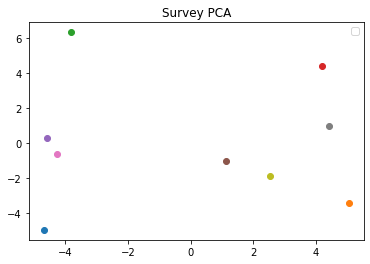

In [20]:
# Simple Component Analysis
pca = PCA(n_components=2)
ca_data= pca.fit_transform(answers)

# Visualization
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
for point in ca_data.tolist():
    plt.scatter(point[0],point[1])

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Survey PCA')

# Plotting Web Component Size Impact

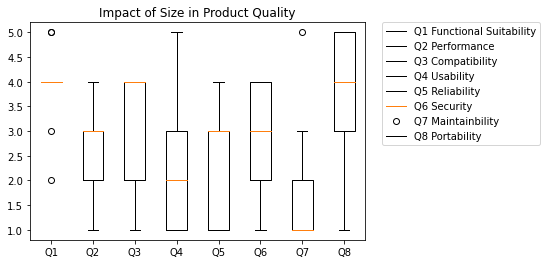

In [21]:
baseline=0
size_plots, ax1 = plt.subplots()
ax1.set_title('Impact of Size in Product Quality')
ax1.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6],metrics[baseline+7]], 
    labels=["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8"])
ax1.legend(["Q1 Functional Suitability","Q2 Performance","Q3 Compatibility","Q4 Usability","Q5 Reliability","Q6 Security","Q7 Maintainbility","Q8 Portability"],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Plotting Web Component Code Structure Impact

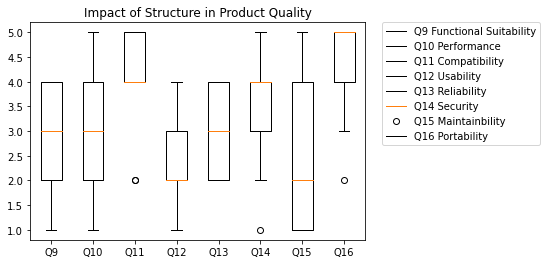

In [22]:
baseline=8
structure_plots, ax2 = plt.subplots()
ax2.set_title('Impact of Structure in Product Quality')
ax2.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6],metrics[baseline+7]],
    labels=["Q9","Q10","Q11","Q12","Q13","Q14","Q15","Q16"])
ax2.legend(["Q9 Functional Suitability","Q10 Performance","Q11 Compatibility","Q12 Usability","Q13 Reliability","Q14 Security","Q15 Maintainbility","Q16 Portability"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.)

plt.show()

# Plotting Web Component Code Dependencies Impact

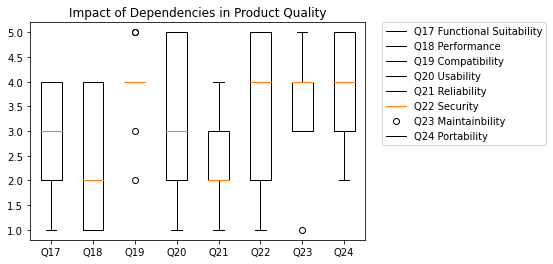

In [23]:
baseline=16
dependencies_plots, ax3 = plt.subplots()
ax3.set_title('Impact of Dependencies in Product Quality')
ax3.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6],metrics[baseline+7]],
    labels=["Q17","Q18","Q19","Q20","Q21","Q22","Q23","Q24"])
ax3.legend(["Q17 Functional Suitability","Q18 Performance","Q19 Compatibility","Q20 Usability","Q21 Reliability","Q22 Security","Q23 Maintainbility","Q24 Portability"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.)

plt.show()


# Plotting Web Component Completeness Impact

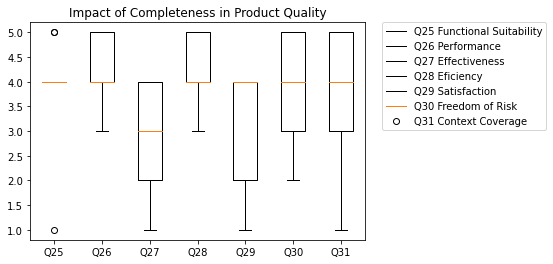

In [24]:
baseline=24
completeness_plots, ax4 = plt.subplots()
ax4.set_title('Impact of Completeness in Product Quality')
ax4.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6]],
    labels=["Q25","Q26","Q27","Q28","Q29","Q30","Q31"])
ax4.legend(["Q25 Functional Suitability","Q26 Performance","Q27 Effectiveness","Q28 Eficiency","Q29 Satisfaction","Q30 Freedom of Risk","Q31 Context Coverage"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.)

plt.show()

# Plotting Web Component Latency Impact

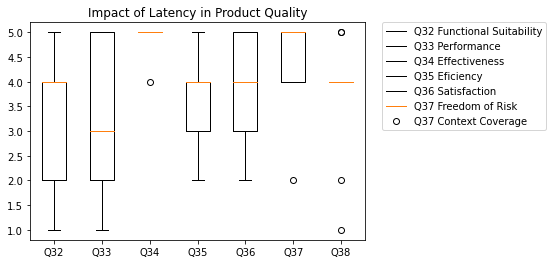

In [25]:
baseline=31
latency_plots, ax5 = plt.subplots()
ax5.set_title('Impact of Latency in Product Quality')
ax5.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6]],
    labels=["Q32","Q33","Q34","Q35","Q36","Q37","Q38"])
ax5.legend(["Q32 Functional Suitability","Q33 Performance","Q34 Effectiveness","Q35 Eficiency","Q36 Satisfaction","Q37 Freedom of Risk","Q37 Context Coverage"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.)

plt.show()

# Plotting Web Component Consistency Impact

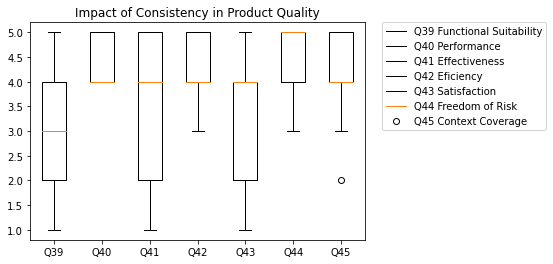

In [26]:
baseline=38
consistency_plots, ax6 = plt.subplots()
ax6.set_title('Impact of Consistency in Product Quality')
ax6.boxplot([metrics[baseline+0],metrics[baseline+1],metrics[baseline+2],metrics[baseline+3],metrics[baseline+4],metrics[baseline+5],metrics[baseline+6]],
    labels=["Q39","Q40","Q41","Q42","Q43","Q44","Q45"])
ax6.legend(["Q39 Functional Suitability","Q40 Performance","Q41 Effectiveness","Q42 Eficiency","Q43 Satisfaction","Q44 Freedom of Risk","Q45 Context Coverage"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.)

plt.show()